In [50]:
#The librarie we need to read, visualize data and run the linear regression model

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import datetime as dt
import math

#Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #splot train-test data 

#Metrics
from sklearn import metrics
from sklearn.metrics import r2_score

# ☣️ ALERT !!!! ☣️
We will be using LinearRegression to predict the stock price, assuming that there's a linear relationship within the prices (Which is not the case in a real-world scenario). This notebook is meant for Linear practice as I'm trying to enhance my skill using linear regression. This notebook is not to encourage any individual to invest using the model we have here 

Help me improve by leaving a comment on my Notebook! 😁😁

The dataset contains data about:

- Date : Date of the price 
- Open : The opening Price of the day
- High : The highest price of the day
- Low : The lowest price of the day
- Close : The closing price of the day
- Adj Close : The adjusted closing price of the day
- Volume : The total number of shares traded in the day (volume)

In [27]:
#read in the data 
df = pd.read_csv('/kaggle/input/twitter-stock-market-dataset/Twitter Stock Market Dataset.csv')

In [28]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0


# Data cleaning/Basic statistics

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2259.0,3.602029e+01,1.411846e+01,13.950,2.555000e+01,3.542000e+01,4.420500e+01,7.836000e+01
High,2259.0,3.669988e+01,1.437206e+01,14.220,2.621500e+01,3.610000e+01,4.501500e+01,8.075000e+01
Low,2259.0,3.533946e+01,1.382872e+01,13.725,2.491250e+01,3.482000e+01,4.332750e+01,7.605000e+01
Close,2259.0,3.600363e+01,1.408999e+01,14.010,2.541000e+01,3.549000e+01,4.413500e+01,7.763000e+01
Adj Close,2259.0,3.600363e+01,1.408999e+01,14.010,2.541000e+01,3.549000e+01,4.413500e+01,7.763000e+01
Volume,2259.0,2.175186e+07,1.909988e+07,0.000,1.233530e+07,1.691305e+07,2.428082e+07,2.692131e+08


In [30]:
df.dtypes

#Date column is in object dtype. Let's convert it to datetime

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [31]:
df['Date'] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

In [32]:
np.where(df.isnull())

#Looks like we have null values at rows 2259, 2260, 2261, 2262, and 2263.
#We will drop these rows

(array([2259, 2259, 2259, 2259, 2259, 2259, 2260, 2260, 2260, 2260, 2260,
        2260, 2261, 2261, 2261, 2261, 2261, 2261, 2262, 2262, 2262, 2262,
        2262, 2262, 2263, 2263, 2263, 2263, 2263, 2263]),
 array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
        5, 6, 1, 2, 3, 4, 5, 6]))

In [33]:
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
...,...,...,...,...,...,...,...
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0


In [56]:
df['Year'] = df['Date'].dt.strftime('%Y')
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_200,RSI,Year
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0,NaN,NaN,2013
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0,NaN,NaN,2013
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0,NaN,NaN,2013
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0,NaN,NaN,2013
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0,NaN,NaN,2013
...,...,...,...,...,...,...,...,...,...,...
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0,40.79920,63.483833,2022
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0,40.85885,66.351274,2022
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0,40.92440,68.378533,2022
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0,40.99130,70.327441,2022


# Data visualization/Analysis

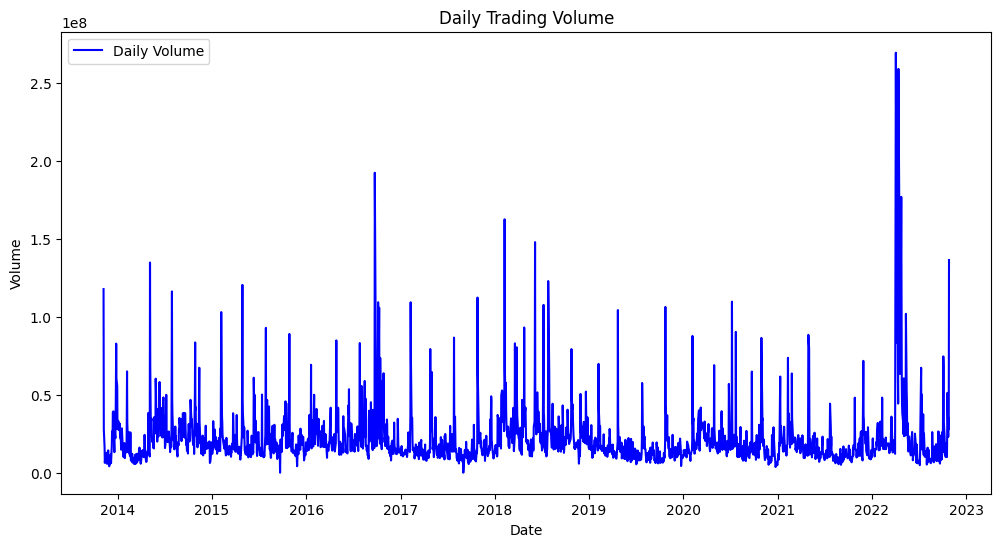

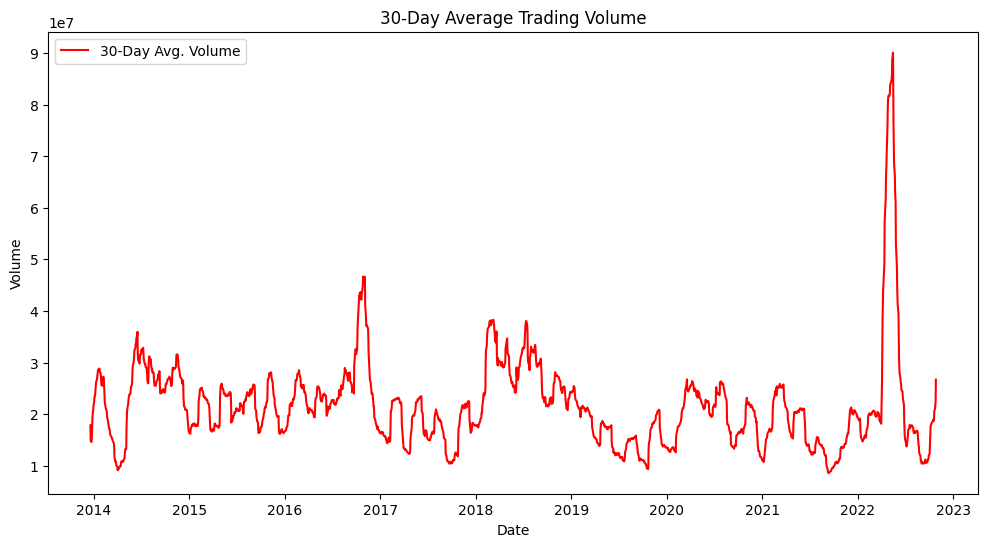

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Daily Volume', color='b')
plt.title('Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['30-Day Average Volume'], label='30-Day Avg. Volume', color='r')
plt.title('30-Day Average Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

#A lot of transactions were going on around March - July, 2022
#It was also the time Elon Musk bought Twitter

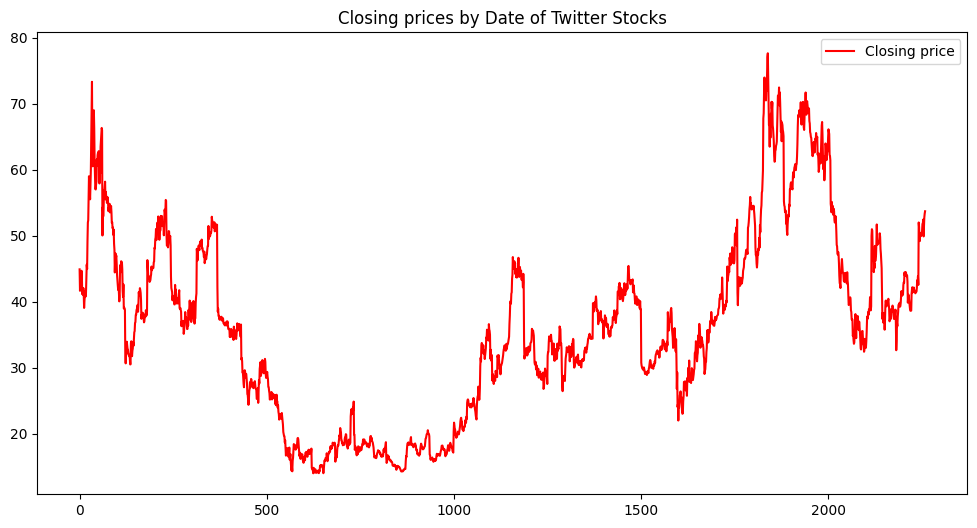

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing price', color='r')
plt.title('Closing prices by Date of Twitter Stocks')
plt.legend()
plt.show()

#Twitter stock doesn't seem to have a specific trend. 
#The movement is very hard to predict 

In [65]:
period = 200
df['SMA_200'] = df['Close'].rolling(window=period).mean()

#Calculate the Moving Average of the Close price within 200 days
#SMA can be useful to look for trend within a period by smoothing out the data

#The down trend in 2022 plus the high amount of transactions of 2022 may be the proof of a huge amount of stocks 
#were being sold at that time

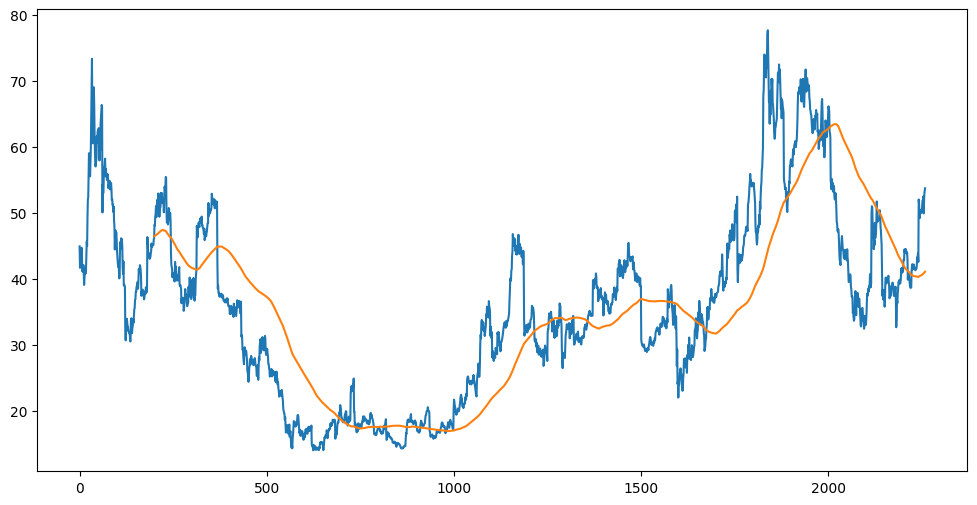

In [71]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(df['SMA_200'])

In [37]:
# Calculate the RSI : Relative Strength index

# Calculate the price change for each period
delta = df['Close'].diff()

# Define the period for the rolling average
period = 40

# Calculate the average gain and average loss for the specified period
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(period).mean()
avg_loss = loss.rolling(period).mean()

# Calculate the Relative Strength (RS) by dividing the average gain by the average loss
rs = avg_gain / avg_loss

# Calculate the Relative Strength Index (RSI)
rsi = 100 - (100 / (1 + rs))

# Add the RSI to the dataframe
df['RSI'] = rsi

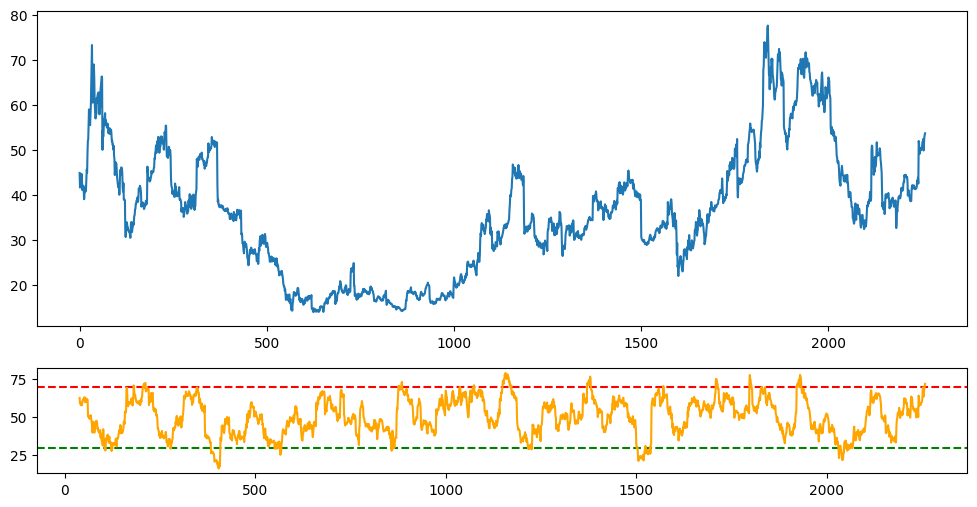

In [72]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(12, 6))

axs[0].plot(df['Close'])
axs[1].axhline(y=70, color="r", linestyle="--")
axs[1].axhline(y=30, color="g", linestyle="--")
axs[1].plot(rsi, color='orange')

#Most of the data is within 30 to 70. If the line is under 30, the stocks are being oversold
#If it's above 70, they are overbought

# Preprocessing the data for linear regression

In [39]:
#split the data into train-test set. We use the rule of thumb (80 train and 20 test)

X = df[['High', 'Low', 'Open', 'Volume']].values
y = df['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#Create a linear regression model

regressor = LinearRegression()

In [41]:
#Fit the train data into the regression model

regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
#Calculate the coefficient of data
#The formula for linear regression is : y = mx + b, in which, m is the coefficient

print(regressor.coef_)

[ 7.90098080e-01  8.36064400e-01 -6.25906793e-01 -1.62549518e-09]


In [43]:
#in y = mx + b, b is the y-intercept. We calculate b

print(regressor.intercept_)

0.03787351231603964


Based on the result we got above, we have a full linear regression formula for each independent variable: 
- y = 7.90098080e-01x + 0.03787351231603964 (High)
- y = 8.36064400e-01x + 0.03787351231603964 (Low)
- y = -6.25906793e-01x + 0.03787351231603964 (Open)
- y = -1.62549518e-09x + 0.03787351231603964 (Volume)

The formula suggests that:
- if x increases by one, meaing the dependent variable (which is y) will increase too
- if x is 0 (meaning the stock price doesn't change), the y-intercept (b) will either increase or decrease

=> To briefly interpret the formula, we are trying to predict the behavior of x (independent variable) by unveiling the impact of x on y (dependent variable). In stock market term, we are trying to see if an increase or decrease of x will have any major impact on y

In [44]:
#See the result of the model and compare it to the actual prices

predicted = regressor.predict(X_test)

In [45]:
#Compare the predicted values to the actual values

dframe = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':predicted.flatten()})
dframe.head(20)

,Actual,Predicted
0,35.959999,35.975052
1,42.270000,40.611683
2,24.920000,24.080850
3,30.190001,30.163420
4,63.470001,64.014767
5,44.169998,43.714640
6,24.260000,24.423863
7,33.439999,32.951412
8,46.130001,45.789293
9,34.820000,34.360059


In [52]:
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R2_score:', r2_score(dframe['Actual'], dframe['Predicted']))

#The results seem to produce really high accuracy with little difference between actual and predicted
#R2_score is almost 1, which indicates a perfect fit

Mean Absolute Error: 0.3085490551886832
Mean Squared Error: 0.2159989755888117
Root Mean Squared Error: 0.4647568994526189
R2_score: 0.9989160338227036


In [73]:
graph = dframe.head(20)

<Figure size 1200x600 with 0 Axes>

<Axes: >

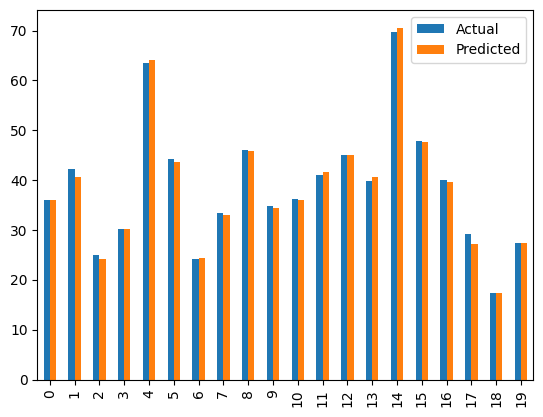

In [75]:
graph.plot(kind='bar')

Overall we have a linear regression with very high accuracy

Thank you so much for checking out my notebook. As I'm still learning from the basic, there will be mistakes in the way I analyze data. If you detect any mistakes in my notebook, I'm more than happy to recieve your feedback and show me some ways to improve !!! 😁😁